In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import sklearn

In [2]:
df = pd.read_csv("data/concrete_data.csv")

<Axes: >

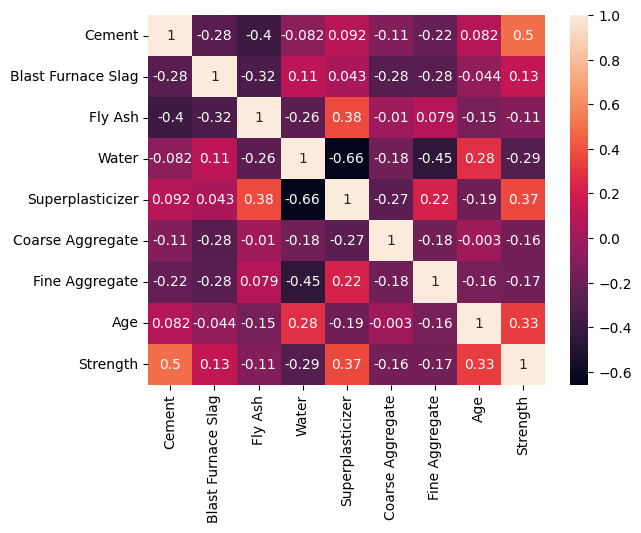

In [3]:
sns.heatmap(df.corr(), annot=True)

In [4]:
y = df["Strength"]
x = pd.DataFrame(df["Cement"])
xs = df.drop(["Strength"], axis=1)

In [5]:
model_pair = sklearn.linear_model.LinearRegression()
model_pair.fit(x, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [6]:
print(
    f"Уравнение регрессии: Strength = {model_pair.intercept_:.6f} + {model_pair.coef_.item():.6f} * Cement",
    f"Коэффиицент детерминации R^2 = {sklearn.metrics.r2_score(y, model_pair.predict(x)):.4f}",
    f"MSE = {sklearn.metrics.mean_squared_error(y, model_pair.predict(x))}",
    sep="\n"
)

Уравнение регрессии: Strength = 13.442528 + 0.079580 * Cement
Коэффиицент детерминации R^2 = 0.2478
MSE = 209.71131982955583


Результаты показывают, что $24.8\%$ изменчивости зависимой переменной объясняются независимой перемнной

In [7]:
x_ls = np.linspace(x.min(), x.max())
y_pred = model_pair.predict(x_ls)

C:\Users\User\PycharmProjects\statistic_methods\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


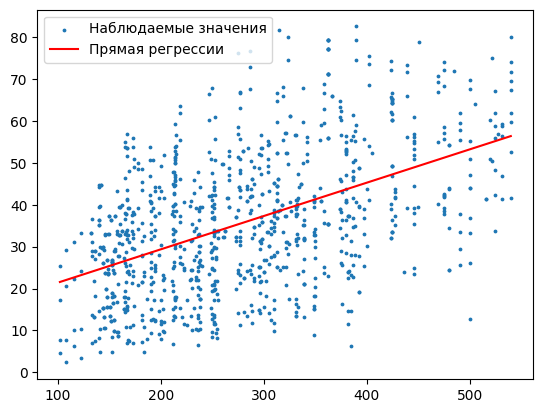

In [8]:
plt.scatter(x, y, label="Наблюдаемые значения", s=3)
plt.plot(x_ls, y_pred, label="Прямая регрессии", color="red")
plt.legend()
plt.show()

Можно заметить, что регрессионная прямая уловила некоторый тренд в данных, но одной переменной недостаточно, чтобы предсказания были с достаточно малыми ошибками

In [9]:
model_multi = sklearn.linear_model.LinearRegression()
model_multi.fit(xs, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
sklearn.metrics.mean_squared_error(y, model_multi.predict(xs))

107.19723607486016

In [11]:
sklearn.metrics.r2_score(y, model_multi.predict(xs))

0.6155198704142721

In [12]:
model_multi.coef_

array([ 0.11980433,  0.10386581,  0.08793432, -0.14991842,  0.2922246 ,
        0.01808621,  0.02019035,  0.11422207])

In [13]:
model_multi.intercept_

np.float64(-23.33121358490351)

При использовании всех независимых переменных в датасете уменьшилась погрешность предсказываемых значений и увеличилась объяснимость изменчивости зависимой переменной. Можно сделать вывод, что больше переменных действительно дают зависмость для целевой переменной.